In [1]:
#we want to do sentiment analysis

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('social_media_engagement1.csv')

In [4]:
df.head()

,post_id,platform,post_type,post_time,likes,comments,shares,post_day,sentiment_score
0,1,Facebook,image,8/17/2023 14:45,2121,474,628,Thursday,positive
1,2,Facebook,carousel,5/14/2023 0:45,3660,432,694,Sunday,neutral
2,3,Instagram,poll,2/21/2023 16:15,4955,408,688,Tuesday,negative
3,4,Twitter,image,11/16/2023 0:45,1183,90,187,Thursday,negative
4,5,Twitter,video,5/23/2023 0:30,3499,247,286,Tuesday,positive


In [5]:
df.info()
df.isnull().sum
df.info
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   post_id          100 non-null    int64 
 1   platform         100 non-null    object
 2   post_type        100 non-null    object
 3   post_time        100 non-null    object
 4   likes            100 non-null    int64 
 5   comments         100 non-null    int64 
 6   shares           100 non-null    int64 
 7   post_day         100 non-null    object
 8   sentiment_score  100 non-null    object
dtypes: int64(4), object(5)
memory usage: 7.2+ KB


post_id             int64
platform           object
post_type          object
post_time          object
likes               int64
comments            int64
shares              int64
post_day           object
sentiment_score    object
dtype: object

In [6]:
# Corrected code
df.info()  # This is correct - shows information about the DataFrame

df.isnull().sum()  # Added parentheses to call the sum method
# This counts the number of null values in each column

df.info()  # Added parentheses to call the info method

# Instead of df.Datatype which doesn't exist, use dtypes attribute
df.dtypes  # This shows the data types of each column in the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   post_id          100 non-null    int64 
 1   platform         100 non-null    object
 2   post_type        100 non-null    object
 3   post_time        100 non-null    object
 4   likes            100 non-null    int64 
 5   comments         100 non-null    int64 
 6   shares           100 non-null    int64 
 7   post_day         100 non-null    object
 8   sentiment_score  100 non-null    object
dtypes: int64(4), object(5)
memory usage: 7.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   post_id          100 non-null    int64 
 1   platform         100 non-null    object
 2   post_type        100 non-null    object
 3   post_time        10

post_id             int64
platform           object
post_type          object
post_time          object
likes               int64
comments            int64
shares              int64
post_day           object
sentiment_score    object
dtype: object

In [7]:
df.describe()

,post_id,likes,comments,shares
count,100.000000,100.000000,100.00000,100.000000
mean,50.500000,2381.810000,202.66000,415.650000
std,29.011492,1632.573284,138.84067,283.877601
min,1.000000,15.000000,10.00000,16.000000
25%,25.750000,895.750000,89.75000,183.000000
50%,50.500000,2220.000000,171.00000,356.500000
75%,75.250000,3593.250000,299.00000,689.500000
max,100.000000,5000.000000,500.00000,993.000000


In [8]:
df['post_time'] = pd.to_datetime(df['post_time'])

In [9]:
df.head()

,post_id,platform,post_type,post_time,likes,comments,shares,post_day,sentiment_score
0,1,Facebook,image,2023-08-17 14:45:00,2121,474,628,Thursday,positive
1,2,Facebook,carousel,2023-05-14 00:45:00,3660,432,694,Sunday,neutral
2,3,Instagram,poll,2023-02-21 16:15:00,4955,408,688,Tuesday,negative
3,4,Twitter,image,2023-11-16 00:45:00,1183,90,187,Thursday,negative
4,5,Twitter,video,2023-05-23 00:30:00,3499,247,286,Tuesday,positive


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


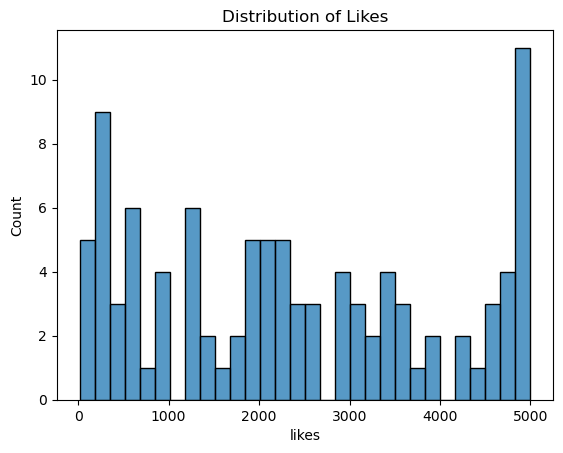

In [10]:
#Distribution Plots
sns.histplot(df['likes'], bins=30)
plt.title("Distribution of Likes")
plt.show()


In [11]:
#Engagement by Platform and Post Type
df.groupby('platform')[['likes', 'comments', 'shares']].mean()
df.groupby('post_type')[['likes', 'comments', 'shares']].mean()

,likes,comments,shares
post_type,,,
carousel,2263.576923,236.000000,531.153846
image,2032.764706,197.176471,371.529412
poll,3061.076923,214.538462,470.769231
text,1815.285714,138.380952,274.952381
video,2906.782609,221.000000,415.000000


In [12]:
# Sentiment Analysis
df['sentiment_score'].value_counts()


sentiment_score
positive    46
neutral     27
negative    27
Name: count, dtype: int64

<Axes: xlabel='post_time'>

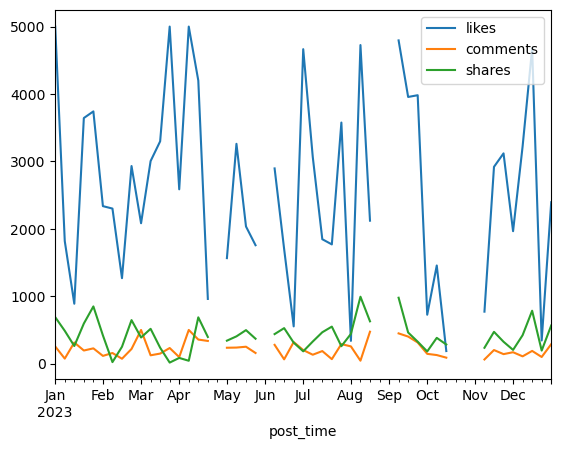

In [13]:
#Time Series Trends
df.set_index('post_time').resample('W')[['likes', 'comments', 'shares']].mean().plot()


In [14]:
# preprocessing

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Load your CSV
#df = pd.read_csv("social_media_engagement1.csv")

# Convert 'post_time' to datetime
df['post_time'] = pd.to_datetime(df['post_time'])

# Extract time features
df['hour'] = df['post_time'].dt.hour
df['day'] = df['post_time'].dt.day
df['month'] = df['post_time'].dt.month

# One-hot encode categorical features
df = pd.get_dummies(df, columns=['platform', 'post_type', 'post_day'])

# Encode the target variable
le = LabelEncoder()
df['sentiment_encoded'] = le.fit_transform(df['sentiment_score'])


In [15]:
X = df.drop(columns=['post_id', 'post_time', 'sentiment_score', 'sentiment_encoded'])
y = df['sentiment_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [17]:
#Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le.classes_))


              precision    recall  f1-score   support

    negative       0.50      0.29      0.36         7
     neutral       0.00      0.00      0.00         2
    positive       0.64      0.64      0.64        11

    accuracy                           0.45        20
   macro avg       0.38      0.31      0.33        20
weighted avg       0.53      0.45      0.48        20



In [18]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_svm = svm_model.predict(X_test)
print(classification_report(y_test, y_pred_svm, target_names=le.classes_))


              precision    recall  f1-score   support

    negative       0.50      0.57      0.53         7
     neutral       0.00      0.00      0.00         2
    positive       0.80      0.36      0.50        11

    accuracy                           0.40        20
   macro avg       0.43      0.31      0.34        20
weighted avg       0.61      0.40      0.46        20



/home/9316b2fe-a8d9-44bb-9a86-a1e0d1f932de/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/9316b2fe-a8d9-44bb-9a86-a1e0d1f932de/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/9316b2fe-a8d9-44bb-9a86-a1e0d1f932de/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

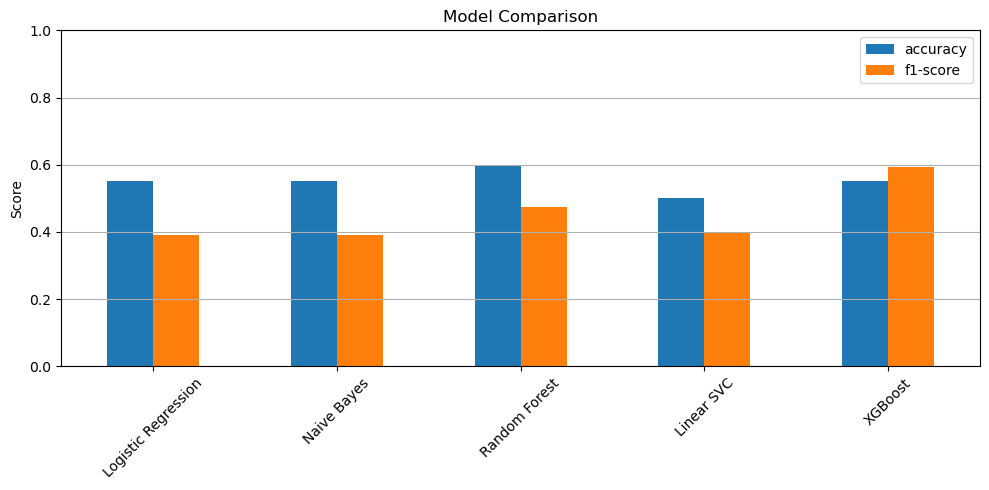

In [19]:
# 1. Imports & Data Load
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# 2. Load Data
df = pd.read_csv('social_media_engagement1.csv')

# 3. Encode Target Labels
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['sentiment_score'])

# 4. Feature Simulation (since no real text)
df['combined'] = (
    df['platform'] + ' ' +
    df['post_type'] + ' ' +
    df['post_day'] + ' ' +
    df['likes'].astype(str) + ' ' +
    df['comments'].astype(str) + ' ' +
    df['shares'].astype(str)
)

# 5. TF-IDF Transformation
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['combined'])
y = df['label']

# 6. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Model Initialization
models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Linear SVC': LinearSVC(max_iter=1000),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# 8. Train, Predict, Evaluate
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = {
        'accuracy': acc,
        'f1-score': report['weighted avg']['f1-score']
    }

# 9. Results Visualization
df_results = pd.DataFrame(results).T
df_results.plot(kind='bar', figsize=(10, 5), title='Model Comparison')
plt.ylabel('Score')
plt.ylim(0, 1.0)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
